### Profile Likelihood Example

In [1]:
//using namespace Roostats;
RooStats::LikelihoodInterval * interval = nullptr;
RooStats::LikelihoodIntervalPlot * plot = nullptr; 

First part is just to access the workspace file and retrieve the model and the data 

In [2]:
TString fileName = "CountingModel.root";
TString workspaceName = "w";
TString modelConfigName = "ModelConfig";
TString dataName = "data";
TString integrationType = "";  

In [3]:
auto file = TFile::Open(fileName);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [4]:
auto w =  (RooWorkspace*) file->Get(workspaceName);
w->Print();
auto mc = (RooStats::ModelConfig*) w->obj(modelConfigName);
auto  data = w->data(dataName);
auto poi = (RooRealVar*) mc->GetParametersOfInterest()->first();  // get POI 


RooWorkspace(w) w contents

variables
---------
(b,b0,nobs,s,sigmab)

p.d.f.s
-------
RooGaussian::constraint[ x=b0 mean=b sigma=sigmab ] = 1
RooProdPdf::model[ pdf * constraint ] = 0.0732626
RooPoisson::pdf[ x=nobs mean=nexp ] = 0.0732626

functions
--------
RooAddition::nexp[ s + b ] = 4

datasets
--------
RooDataSet::data(nobs)

parameter snapshots
-------------------
ModelConfig__snapshot = (s=3)

named sets
----------
ModelConfig_GlobalObservables:(b0)
ModelConfig_NuisParams:(b)
ModelConfig_Observables:(nobs)
ModelConfig_POI:(s)
ModelConfig__snapshot:(s)

generic objects
---------------
RooStats::ModelConfig::ModelConfig



In [5]:
RooStats::ProfileLikelihoodCalculator plCalc(*data,*mc);

Set the intervar Confidence Level

In [6]:
plCalc.SetConfidenceLevel(0.95);

In [7]:
interval = plCalc.GetInterval();

[#1] INFO:Minization --  Including the following contraint terms in minimization: (constraint)
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoGLobalFit - find MLE 
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoMinimizeNLL - using Minuit / Migrad with strategy 1
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_data_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdf)
[#1] INFO:Minization -- 
  RooFitResult: minimized FCN value: 0.309508, estimated distance to minimum: 1.00104e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                     b    9.9989e-01 +/-  1.99e-01
                

In [8]:
cout << 100*plCalc.ConfidenceLevel() << "% interval is : ["<< interval->LowerLimit(*poi) 
     << ", "<< interval->UpperLimit(*poi) <<"] "<<endl;

95% interval is : [Warning: lower value for s is at limit 0
0, 3.41849] 


In [11]:
plot = new RooStats::LikelihoodIntervalPlot(interval);
plot->SetNPoints(100);   // if plotting takes a long time
plot->SetRange(0,10);

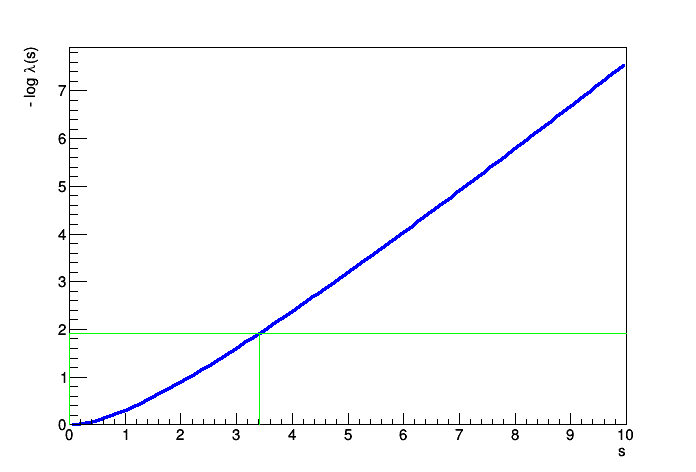

......................................................................................................

In [14]:
plot->Draw("tf1"); gPad->Draw();

#### Compute the significance with the Profile Likelihood

In [ ]:
RooStats::HypoTestResult * htRes = nullptr; 

In [ ]:
htRes = plCalc.GetHypoTest(); 
htRes->Print();

In [ ]:
std::cout << "Significance = " << htRes->Significance() << " for p - value = " << htRes->NullPValue() << std::endl; 